In [270]:
#数据集读取，数据储存于data，标签储存于labels
N = 5000
import numpy as np
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
from imageio import imread,imsave

# 训练集文件
train_images_idx3_ubyte_file = "E:\\大一下 2022 春夏学期\\SRTP\\minst数据集\\t10k-images-idx3-ubyte.gz"
# 训练集标签文件
train_labels_idx1_ubyte_file = "E:\\大一下 2022 春夏学期\\SRTP\\minst数据集\\t10k-labels-idx1-ubyte.gz"
# 测试集文件
test_images_idx3_ubyte_file = "E:\\大一下 2022 春夏学期\\SRTP\\minst数据集\\test-images-idx3_ubyte.gz"
# 测试集标签文件
test_labels_idx1_ubyte_file = "E:\\大一下 2022 春夏学期\\SRTP\\minst数据集\\train-labels-idx1-ubyte.gz"

#提取数据矩阵
f = gzip.open(train_images_idx3_ubyte_file,'r')
image_size = 28 #不能改，不要改！
num_images = N #调整读取数量，可以改
f.read(16) #不能改，不要改！
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

#提取数据标签
f = gzip.open(train_labels_idx1_ubyte_file,'r')
f.read(8) #不能改，不要改！
labels = []
for i in range(0,N):   
    buf = f.read(1)
    labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))

In [271]:
print(data.shape)
#print(data[0,:,:])
x0=[]
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
x8=[]
x9=[]

(5000, 28, 28)


In [272]:
for i in range(num_images):
    if labels[i] == 0:
        x0.append(data[i,:,:])
    elif labels[i] == 1:
        x1.append(data[i,:,:])
    elif labels[i] == 2:
        x2.append(data[i,:,:])
    elif labels[i] == 3:
        x3.append(data[i,:,:])
    elif labels[i] == 4:
        x4.append(data[i,:,:])
    elif labels[i] == 5:
        x5.append(data[i,:,:])
    elif labels[i] == 6:
        x6.append(data[i,:,:])
    elif labels[i] == 7:
        x7.append(data[i,:,:])
    elif labels[i] == 8:
        x8.append(data[i,:,:])
    elif labels[i] == 9:
        x9.append(data[i,:,:])

In [273]:
def as_row_matrix (X):
    if len (X) == 0:
        return np. array ([])
    mat = np. empty ((0 , X [0].size ), dtype =X [0]. dtype )
    for row in X:
        mat = np.vstack(( mat , np.asarray( row ).reshape(1 , -1))) # 1 x r*c 
    return mat

In [274]:
def subplot ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%s #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s #%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

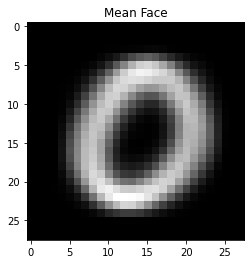

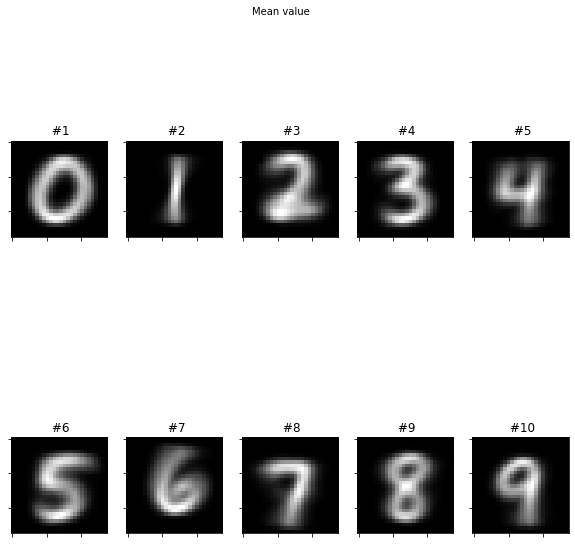

In [275]:
x0_array = np.array(x0) 
average0 = np.reshape(as_row_matrix(x0_array).mean( axis =0), x0[0].shape)
plt.imshow(average0, cmap=plt.cm.gray)
plt.title("Mean Face")
plt.show()
x1_array = np.array(x1) 
average1 = np.reshape(as_row_matrix(x1_array).mean( axis =0), x1[0].shape)
x2_array = np.array(x2) 
average2 = np.reshape(as_row_matrix(x2_array).mean( axis =0), x2[0].shape)
x3_array = np.array(x3) 
average3 = np.reshape(as_row_matrix(x3_array).mean( axis =0), x3[0].shape)
x4_array = np.array(x4) 
average4 = np.reshape(as_row_matrix(x4_array).mean( axis =0), x4[0].shape)
x5_array = np.array(x5) 
average5 = np.reshape(as_row_matrix(x5_array).mean( axis =0), x5[0].shape)
x6_array = np.array(x6) 
average6 = np.reshape(as_row_matrix(x6_array).mean( axis =0), x6[0].shape)
x7_array = np.array(x7) 
average7 = np.reshape(as_row_matrix(x7_array).mean( axis =0), x7[0].shape)
x8_array = np.array(x8) 
average8 = np.reshape(as_row_matrix(x8_array).mean( axis =0), x8[0].shape)
x9_array = np.array(x9) 
average9 = np.reshape(as_row_matrix(x9_array).mean( axis =0), x9[0].shape)
average = []
average.append(average0)
average.append(average1)
average.append(average2)
average.append(average3)
average.append(average4)
average.append(average5)
average.append(average6)
average.append(average7)
average.append(average8)
average.append(average9)
average = np.array(average)
#average.shape
subplot ( title ="Mean value", images = average, rows =2, cols =5,  colormap =plt.cm.gray )

In [288]:
def get_number_of_components_to_preserve_variance(eigenvalues, variance=.95):
    for ii, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigen_value_cumsum > variance:
            return ii

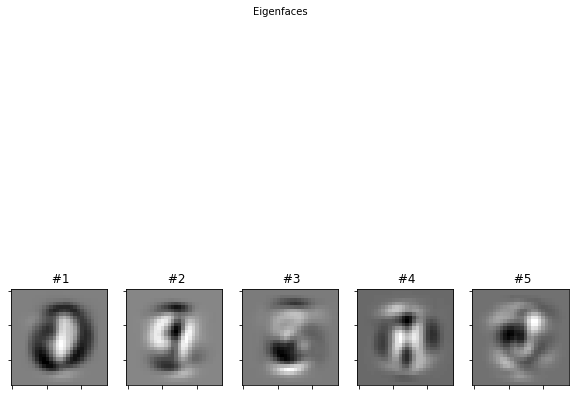

In [296]:
def pca (X, num_components =0): 
    [n,d] = X.shape
    if ( num_components <= 0) or ( num_components >n):
        num_components = n
        mu = X.mean( axis =0)
        X = X - mu
    if n>d:
        C = np.dot(X.T,X)
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
    else :
        C = np.dot (X,X.T) 
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T, eigenvectors )
        for i in range (n):
            eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm( eigenvectors [:,i])
    idx = np.argsort (- eigenvalues )
    eigenvalues = eigenvalues [idx ]
    eigenvectors = eigenvectors [:, idx ]
    num_components = get_number_of_components_to_preserve_variance(eigenvalues)
    eigenvalues = eigenvalues [0: num_components ].copy ()
    eigenvectors = eigenvectors [: ,0: num_components ].copy ()
    return [ eigenvalues , eigenvectors , mu]
[X,y] = [average,labels]
[eigenvalues, eigenvectors, mean] = pca (as_row_matrix(X))
E = []
number = eigenvectors.shape[1]
for i in range (min(number, 16)):
    e = eigenvectors[:,i].reshape(X[0].shape )
    E.append(np.asarray(e))

# plot them and store the plot to " python_eigenfaces .pdf"
subplot ( title ="Eigenfaces", images=
        E, rows =1, cols =5, colormap =plt.cm.gray )

In [290]:
def predict (W, mu , projections, X):
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (1 , -1) , mu)
    for i in range (len(projections)):
        dist = dist_metric( projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = i
    return minClass


In [291]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu
projections = []
for xi in X:
    projections.append(project (eigenvectors, xi.reshape(1 , -1) , mean))
len(projections)

10

In [292]:
def dist_metric(p,q):
    p = np.asarray(p).flatten()
    q = np.asarray(q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

In [293]:
success = 0
sums = 0
for i in range(1,N):
    image = data[i,:,:]
    test_image = np. asarray (image , dtype =np. uint8 )
    predicted = predict(eigenvectors, mean , projections, test_image)
    if predicted == labels[i]:
        success += 1
#    else:
#        subplot ( title ="Prediction", images =[test_image, X[predicted]], rows =1, cols =2, colormap =plt.cm.gray)
    sums += 1
confident = success/sums
print(confident)

0.735747149429886
